### Compare results of different experiments

In [13]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from modules.evalutils import get_dir_nums, get_tbls, param_diffs

In [102]:
nums = get_dir_nums(log_dir='../dbin/')
nums

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [103]:
ret = get_tbls('basicexp', nums, log_dir='../dbin/')

d_metrics, d_resid, d_params = ret

In [107]:
d_params.T.head(6)

,basicexp-0,basicexp-1,basicexp-2,basicexp-3,basicexp-4,basicexp-5,basicexp-6,basicexp-7,basicexp-8,basicexp-9,basicexp-10,basicexp-11,basicexp-12,basicexp-13,basicexp-14,basicexp-15,basicexp-16,basicexp-17
_train_name,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops,rf-v1-crops
_test_name,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-all,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy,test-regulation-2-easy
_train_path,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1,../../../rf-chess-data/cropped_v1
_test_path,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-all-2,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-all,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy,../../../other-chess-data/regulation-test-2-easy
_model_arch,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50,resnet18,resnet18,resnet34,resnet34,resnet50,resnet50,resnet50,resnet50,resnet50,resnet50
_fit_one_cycle_epochs,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


##### expbuilder-2: augmentations

In [58]:
base = 'basicexp-'
nums = range(2,8)
exps = [base + str(i) for i in nums]

exp_params = d_params[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

In [79]:
param_diffs(exp_params)

_train_seed      3
_max_lighting    2
_max_warp        2
_max_rotate      2
model_fn         6
dtype: int64

In [80]:
exps_a, exps_b = exps[:3], exps[3:]

In [81]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

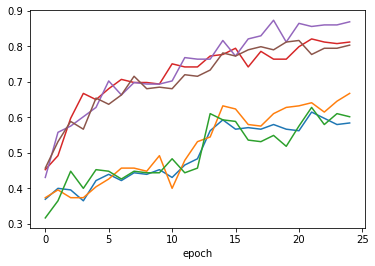

In [83]:
df_agg.T.plot(legend=None)

##### expbuilder-2b: architectures

In [111]:
base = 'basicexp-'
nums = range(8,13+1)
exps = [base + str(i) for i in nums]

exp_params = d_params.T[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

In [112]:
param_diffs(exp_params)

_model_arch    3
_train_seed    2
model_fn       6
dtype: int64

In [113]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

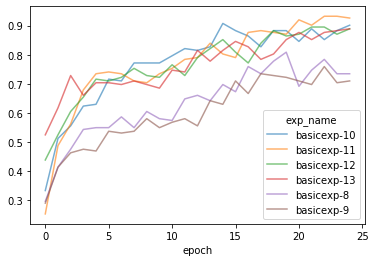

In [114]:
df_agg.T.plot(alpha=0.6)

In [89]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_loss')

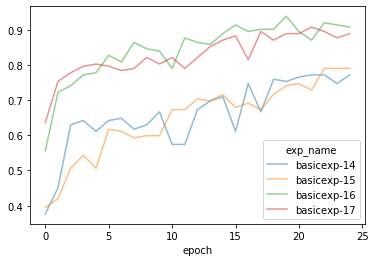

In [108]:
df_agg.T.plot(alpha=0.5)

##### expbuild-2c: different crop styles

In [98]:
base = 'basicexp-'
nums = range(14,17+1)
exps = [base + str(i) for i in nums]

exp_params = d_params[exps]
exp_metrics= d_metrics[d_metrics['exp_name'].isin(exps)]

param_diffs(exp_params)

_train_seed     2
_custom_crop    2
model_fn        4
dtype: int64

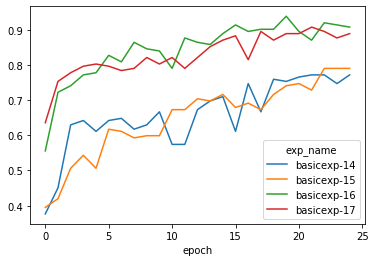

In [99]:
df_agg =pd.pivot(exp_metrics,
                 index='exp_name', 
                 columns='epoch', 
                 values='test_accuracy')

df_agg.T.plot()